In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from helpers import plot_tools as ptools

import os

In [27]:
# Load data
diabetes_data_file_path = os.path.join('input', 'diabetes.csv')
diabetes_data = pd.read_csv(diabetes_data_file_path)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# find correlations in data
correlations = diabetes_data.corr()
correlations = correlations.Outcome.sort_values(ascending=False)

print('correlations : ')
display(correlations)

correlations : 


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

The `Glucose` and the `BMI` columns have the highest correlation with the `Outcome`.
We will choose these columns as `features` (`X`).

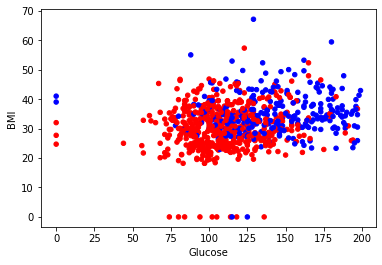

In [29]:
features = ['Glucose', 'BMI']
diabetes_data.plot.scatter(
    x='Glucose',
    y='BMI',
    color=diabetes_data.Outcome.map({0: 'red', 1: 'blue'})
)

We need to drop some missing values (represented by left-most group and the down-most group on the graph above)

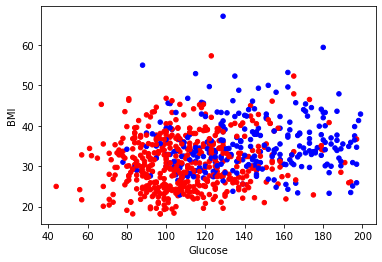

In [30]:
# Filter rows with missing values ("drop non-available")
diabetes_data[features] = diabetes_data[features].replace(0, np.NaN)
diabetes_data = diabetes_data.dropna(axis=0)

diabetes_data.plot.scatter(
    x='Glucose',
    y='BMI',
    color=diabetes_data.Outcome.map({0: 'red', 1: 'blue'})
)

mean_absolute_error = 0.20212765957446807


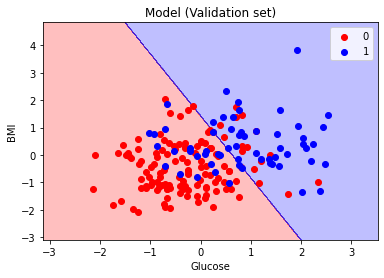

In [31]:
# reminder : features = ['BMI', 'Glucose']
# X is our features, and y our target   
X = diabetes_data[features].values
y = diabetes_data.Outcome.values

# Split data into training and validation data, for both features and target.
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=0)

# apply feature scaling
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

# Define model
diabetes_model = LogisticRegression(random_state=1)

# Fit model (capture patterns in the data)
diabetes_model.fit(train_X, train_y)

# get predicted purchased on validation data
val_predictions = diabetes_model.predict(val_X)

# print mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)
print(f'mean_absolute_error = {val_mae}')

ptools.plot_decision_regions_OG(val_X, val_y, 'Validation set', 'Glucose', 'BMI', model=diabetes_model)

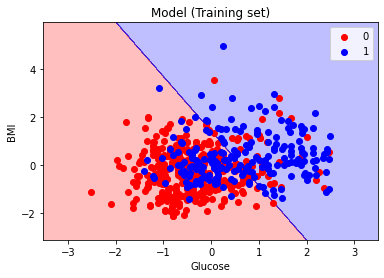

In [32]:
ptools.plot_decision_regions_OG(train_X, train_y, 'Training set', 'Glucose', 'BMI', model=diabetes_model)
